# Simple implementation af Kalman filteret
Koden er nu skrevet sådan at $F$ er afhængig af tid, da vores koordinater indgår i dens udregning. Vi skal have nogle anre ligninger i spil for at kunne lave den uden det
<br>
<b>OBS OBS OBS OBS OBS</b> <br>
<b>Læs ovenfor</b>
\begin{align*}
    \intertext{kinematic and observations model}
    \mathbf{x}[n]&=\Phi \mathbf{x}[n-1] + \mathbf{u}[n], \\
    \mathbf{z}[n]&=\mathbf{x}[n] + \mathbf{w}[n],\\
    \intertext{the prediction and prediction mean square error,}
    \hat{\mathbf{x}}[n|n-1]&=\Phi\hat{\mathbf{x}}[n-1|n-1], \\
    M[n|n-1]&=\Phi M[n-1|n-1]\Phi^\top + S_{\mathbf{u}}, \\
    \intertext{the Kalman gain,}
    K[n]&=M[n|n-1](S_{\mathbf{w}}+M[n|n-1])^{-1},\\
    \intertext{and the correction and estimate mean square error,}
    \hat{\mathbf{x}}[n|n]&=\hat{\mathbf{x}}[n|n-1]+K[n](\mathbf{z}[n]-\hat{\mathbf{x}}[n|n-1]),\\
    M[n|n]&=(I-K[n])M[n|n-1].
\end{align*}

In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
sys.path.insert(1, os.getcwd())
import tracking as tr

In [12]:
distance, velocity = tr.velocity_algo("truth1.txt")
x_state = np.concatenate((distance, velocity), axis=1)

cov_w, cov_u = [np.eye(6)]*2
x_initial_guess, M_initial_guess = x_state[0], np.eye(6)
kf = tr.Kalman(cov_u, cov_w, x_initial_guess, M_initial_guess, 0.1)
kf.run_sim(x_state)

In [13]:
names, vals = kf.get_data()
x, y, z = vals[0][:, 3], vals[0][:, 4], vals[0][:, 5]
rx, ry, rz = velocity[:, 0], velocity[:, 1], velocity[:, 2]

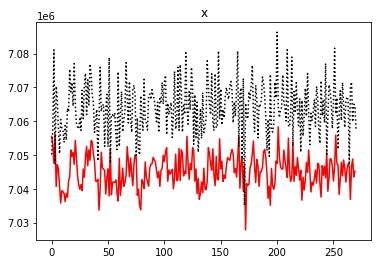

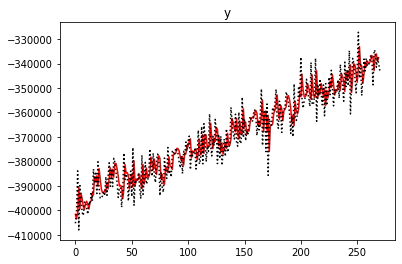

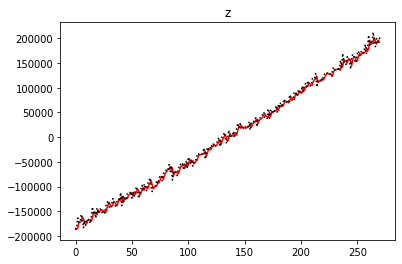

In [14]:
plt.title("x")
plt.plot(x, c='r')
plt.plot(rx, c='k', ls='dotted')
plt.show()

plt.title("y")
plt.plot(y, c='r')
plt.plot(ry, c='k', ls='dotted')
plt.show()

plt.title("z")
plt.plot(z, c='r')
plt.plot(rz, c='k', ls='dotted')
plt.show()